# Project Report: Predicting User Knowledge from Study Habits and Exam Performance

**DSCI 100 009: Group 23** <br>
Allison Fellhauer (38395166) <br>
Agastya Kaul (78851433) <br>
Grace Li (27986504) <br>
Xiangyuan Li (57380230) <br>

## Introduction: Data set and background information

### Background Information

#### User Modeling and User Knowledge

User modeling is used to create a representation of a user based on their interactions with the system ([Chignell & Hancock, 1988](https://doi.org/10.1016/B978-0-444-70536-5.50051-8)). This model can be used to personalize and improve a user’s experience  ([Kahraman et al. 2013](https://doi.org/10.1016/j.knosys.2012.08.009)). For example, in e-learning, a user model can be used to track a student’s knowledge level to adapt their learning experience ([Al-Tarabily et al. 2018](https://doi.org/10.1109/ACCESS.2018.2847334)) .

In the dataset [User Knowledge Modeling](https://doi.org/10.24432/C5231X), the authors investigate which user interactions should be used to create the best user knowledge model ([Kahraman et al. 2013](https://doi.org/10.1016/j.knosys.2012.08.009)). The goal is to dynamically adjust the student’s learning experience by building a model that classifies their knowledge-level ([Kahraman et al. 2013](https://doi.org/10.1016/j.knosys.2012.08.009)).

### About the data set

**Our data set:** [User Knowledge Modeling](https://doi.org/10.24432/C5231X)

We have chosen to explore the User Knowledge Modeling data set, which is a data set that classifies users' knowledge of a topic (electrical DC machines) ([Kahraman et al. 2013](https://doi.org/10.1016/j.knosys.2012.08.009)).

There are 258 observations and 6 variables (5 features and 1 target) in the data set.

#### Features (the predictors)
The features are elements of the user model that include two topics:

A) Goal topics (learning objects):
- The degree of time spent studying the material [STG, double]
- The degree of repetition of the material [SCG, double]
- The performance in exams [PEG, double]


B) Prerequisite topics:
- The degree of study time corresponding to the prerequisite objects [STR, double]
- The knowledge level of the prerequisite objects [LPR, double]

#### Target (predicted class)
User knowledge level [UNS, factor]

Categorized into 4 levels:
- very low (beginner)
- low (intermediate)
- middle (expert) 
- high (advanced)

#### Choosing our predictors
We decided to use all predictors to model the user knowledge. For the goal topics, both time spent studying and degree of repetition contribute to a user's learning. More studying and repetition lead to greater knowledge. Furthermore, a common way to evaluate knowledge in academics is through using tests. Finally, knowledge of pre-requisite knowledge is positively correlated with student achievement (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2630138/)

We classify study habits as the time spent studying and the degree of repetition, which contributes to increased learning. Exam performance is a way to assess learning. 

### Our Question

**Can we predict the knowledge level of a user given their study habits and their performance on the exam?**

Our hypothesis is that if a user has high pre-requisite knowledge, good study habits of both pre-requisite and goal topics, and does well on the exam, we can infer that they have a greater knowledge level.

**Methods & Results:**
describe in written English the methods you used to perform your analysis from beginning to end that narrates the code the does the analysis.
your report should include code which:
- loads data from the original source on the web 
- wrangles and cleans the data from it's original (downloaded) format to the format necessary for the planned analysis
- performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 
- creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
- performs the data analysis
- creates a visualization of the analysis 
- note: all tables and figure should have a figure/table number and a legend

## Methods and Results

### Loading necessary libraries and reading in the data

In [1]:
#load all the necessary libraries
library(tidyverse)
library(repr)
library(tidymodels)
install.packages("RColorBrewer")
library(RColorBrewer)
install.packages("kknn") 
library("kknn")
install.packages("themis")
library(themis)

#read data from the web (GitHub raw file)
url <- "https://raw.githubusercontent.com/afellhauer/DSCI_Group_Project/main/data/Data_User_Modeling_Dataset_Hamdi.csv"
knowledge <- read_csv(url)
head(knowledge)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
0.10,0.10,0.15,0.65,0.30,Middle
0.08,0.08,0.08,0.98,0.24,Low
0.09,0.15,0.40,0.10,0.66,Middle


### Make data usable and readable

Looking at the values, the format is tidy. To make the data usable, UNS (user_knowledge) needs to be converted from a character to a factor. To increase readability, we renamed all variables. We [checked for any missing data](https://www.tutorialspoint.com/dealing-with-missing-data-in-r) and [printed the result](https://www.geeksforgeeks.org/printing-output-of-an-r-program/). There are no missing values.

In [2]:
knowledge_mutate <- knowledge |>
    mutate(UNS = as_factor(UNS)) |> #change the class from a chr to a factor
    rename("study_time_goal" = STG, #relabel all variables to understand them better
           "repetition" = SCG,
           "study_time_related" = STR,
           "performance_related" = LPR, 
           "performance_goal" = PEG,
           "user_knowledge" = UNS) |>
    select(study_time_goal, repetition, performance_goal, user_knowledge)

head(knowledge_mutate)

missing <- sum(is.na(knowledge_mutate)) # check for missing values
print(paste("Number of missing values: ", missing))

study_time_goal,repetition,performance_goal,user_knowledge
<dbl>,<dbl>,<dbl>,<fct>
0.00,0.00,0.00,very_low
0.08,0.08,0.90,High
0.06,0.06,0.33,Low
0.10,0.10,0.30,Middle
0.08,0.08,0.24,Low
0.09,0.15,0.66,Middle


[1] "Number of missing values:  0"


### Split the data into training and testing sets

To ensure reproducibility, we set the seed. We used a proportion of 0.75 for the training to testing ratio. We also stratified the data using user_knowledge, which is the class we are trying to predict. 

In [3]:
set.seed(200) #set seed to be reproducible
#create the initial split of the data
#stratify based on user_knowledge
knowledge_split <- initial_split(knowledge_mutate, prop = 0.75, strata = user_knowledge)

#collected the testing and training portions
knowledge_training <- training(knowledge_split)
knowledge_testing <- testing(knowledge_split)

glimpse(knowledge_training) #see that the number of rows is less than the dataset

Rows: 192
Columns: 4
$ study_time_goal  <dbl> 0.080, 0.180, 0.100, 0.090, 0.080, 0.200, 0.130, 0.18…
$ repetition       <dbl> 0.080, 0.180, 0.100, 0.300, 0.325, 0.450, 0.390, 0.34…
$ performance_goal <dbl> 0.90, 0.81, 0.90, 0.85, 0.56, 0.78, 0.77, 0.90, 0.86,…
$ user_knowledge   <fct> High, High, High, High, High, High, High, High, High,…


### Summarizing the data

We examined how balanced or unbalanced the data set is. We created a table that summarized the number of counts for each group of the user_knowledge variable. 

The very_low (beginner) knowledge level is not as represented in this data set.

In [4]:
summary_counts <- knowledge_training |>
    group_by(user_knowledge) |> #group based on the class
    summarize(count = n()) #gets the count (number of observations of each)
summary_counts

user_knowledge,count
<fct>,<int>
very_low,20
High,47
Low,59
Middle,66


**Table 1**: Proportion of observations classified as each user knowledge level (very_low, low, high, middle)

We then summarized the means of our predictors for each class.

In [5]:
summary <- knowledge_training |>
    select(user_knowledge, study_time_goal, repetition, performance_goal) |> 
    #select only the class and the predictors
    group_by(user_knowledge) |>
    summarize("mean_study_time" = mean(study_time_goal), "mean_repetition" = mean(repetition),
              "mean_exam_score" = mean(performance_goal)) 
    #get the mean for each predictor for each group
summary

user_knowledge,mean_study_time,mean_repetition,mean_exam_score
<fct>,<dbl>,<dbl>,<dbl>
very_low,0.3172000,0.1787500,0.0985000
High,0.4220000,0.4170426,0.7646809
Low,0.3249831,0.3482542,0.2386949
Middle,0.4147727,0.3676061,0.5430303


**Table 2**: Mean study time and mean exam score for each user knowledge level (very_low, low, middle, high)

### Visualize the data

We visualized the distribution of the different groups according to their counts. Again, this highlights that the data is not completely balanced.

*To left align the caption, we used [this code](https://stackoverflow.com/questions/64701500/left-align-ggplot-caption)*.

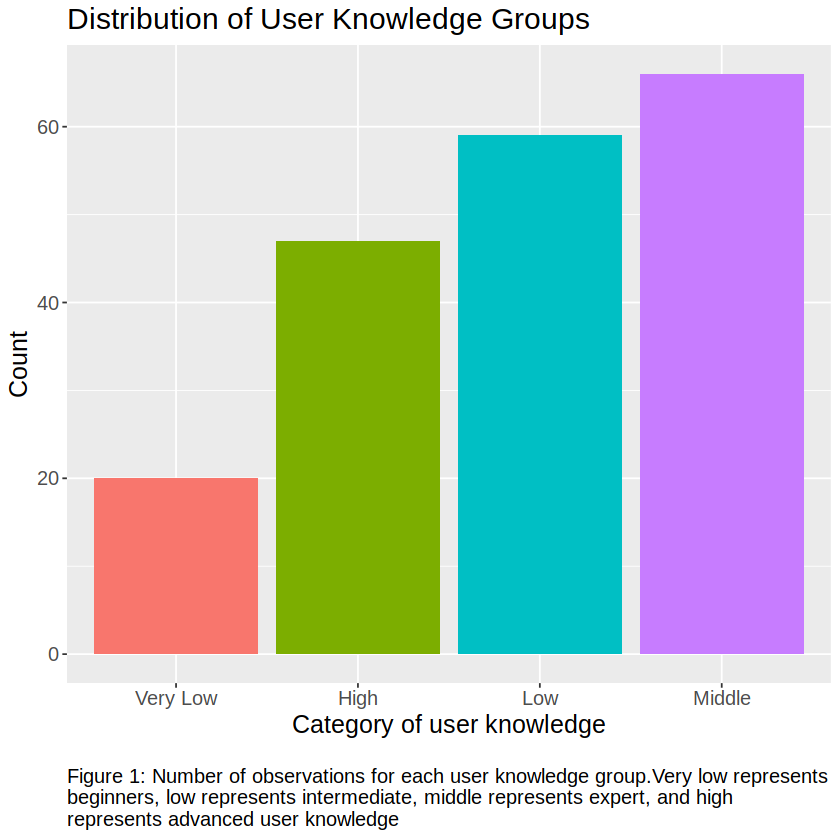

In [6]:
knowledge_training_plot_distribution <- knowledge_training |>
    ggplot(aes(x = fct_recode(user_knowledge, "Very Low" = "very_low"), fill = user_knowledge)) + #change the label of very_low to Very Low
    geom_bar() + #use the default stat = "count"
    xlab("Category of user knowledge") +
    ylab("Count")

#make the plot look nicer
knowledge_training_plot_distribution <- knowledge_training_plot_distribution +
    theme(text = element_text(size = 15), legend.position = "none", #remove the legend
         plot.caption = element_text(hjust = 0)) + #set the text to left align
    ggtitle("Distribution of User Knowledge Groups") +
    labs(caption = "
Figure 1: Number of observations for each user knowledge group.Very low represents 
beginners, low represents intermediate, middle represents expert, and high 
represents advanced user knowledge") +
    scale_color_brewer(palette = "Set2") #set the color palette
    
knowledge_training_plot_distribution

Then, we plotted the data according to study time and exam performance of each of the user knowledge groups. We start to see some distinct groups form.

*To left align the caption, we used [this code](https://stackoverflow.com/questions/64701500/left-align-ggplot-caption)*.

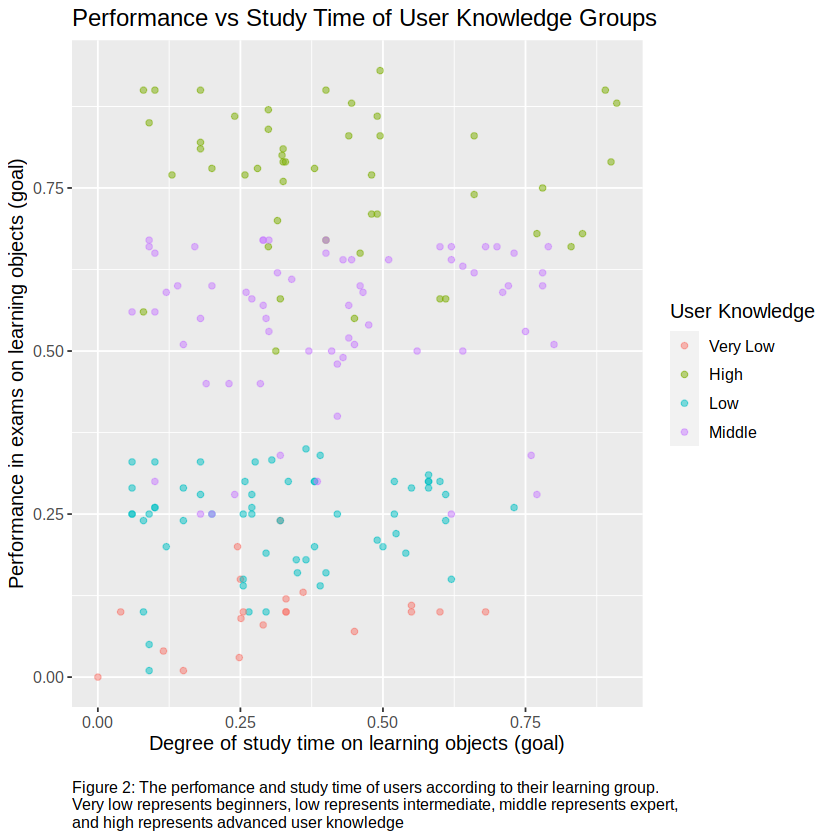

In [7]:
knowledge_training_plot_study_vs_goal <- knowledge_training |>
    ggplot(aes(x = study_time_goal, y = performance_goal, 
               color = fct_recode(user_knowledge, "Very Low" = "very_low"))) + #change the label of very_low to Very Low
    geom_point(alpha = 0.5) +
    xlab("Degree of study time on learning objects (goal)") +
    ylab("Performance in exams on learning objects (goal)") +
    labs(color = "User Knowledge", 
        caption = "
Figure 2: The perfomance and study time of users according to their learning group.
Very low represents beginners, low represents intermediate, middle represents expert, 
and high represents advanced user knowledge") +
    theme(text = element_text(size = 12), plot.caption = element_text(hjust = 0)) +
    ggtitle("Performance vs Study Time of User Knowledge Groups")
knowledge_training_plot_study_vs_goal

### Analyse the data

As the data is unbalanced (see Fig. 1), we decide to create three models:
- model normal: no balancing
- model upsample: upsample so all ratios are the same as the category with the greatest count (Middle)
- model downsample: downsample so all ratio are the same as the category with the lowest count (Very Low)

#### Model Normal

**Step 1: Create a recipe using all predictors and scale the values**

In [8]:
knowledge_recipe <- recipe(user_knowledge ~ ., data = knowledge_training) |>
    step_scale(all_predictors())

**Step 2: Tune the model using 5-fold cross-validation**

In [9]:
# create a knn classification model and set the neighbors to tune()
set.seed(100)
knowledge_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
  set_engine("kknn") |>
  set_mode("classification")

# create a sequence of values from 1 to 20
k_vals <- tibble(neighbors = seq(from = 1, to = 20, by = 1)) 

# split the training data into 5 folds
knowledge_vfold <- vfold_cv(knowledge_training, v = 5, strata = user_knowledge)

# tune the model and collect the accuracy
knowledge_results <- workflow() |>
  add_recipe(knowledge_recipe) |>
  add_model(knowledge_spec) |>
  tune_grid(resamples = knowledge_vfold, grid = k_vals) |>
  collect_metrics() 

# filter the results for accuracies
accuracies <- knowledge_results |>
  filter(.metric == "accuracy")

accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.7240167,5,0.012693510,Preprocessor1_Model01
2,accuracy,multiclass,0.7240167,5,0.012693510,Preprocessor1_Model02
3,accuracy,multiclass,0.7450620,5,0.013550925,Preprocessor1_Model03
4,accuracy,multiclass,0.7449198,5,0.020324443,Preprocessor1_Model04
5,accuracy,multiclass,0.7499125,5,0.030735989,Preprocessor1_Model05
6,accuracy,multiclass,0.7500547,5,0.023928903,Preprocessor1_Model06
7,accuracy,multiclass,0.7450760,5,0.021376688,Preprocessor1_Model07
8,accuracy,multiclass,0.7554674,5,0.016469457,Preprocessor1_Model08
9,accuracy,multiclass,0.7766769,5,0.015609755,Preprocessor1_Model09


**Step 3: Choose the appropriate K-value for the training set by plotting accuracy for each selection of K**

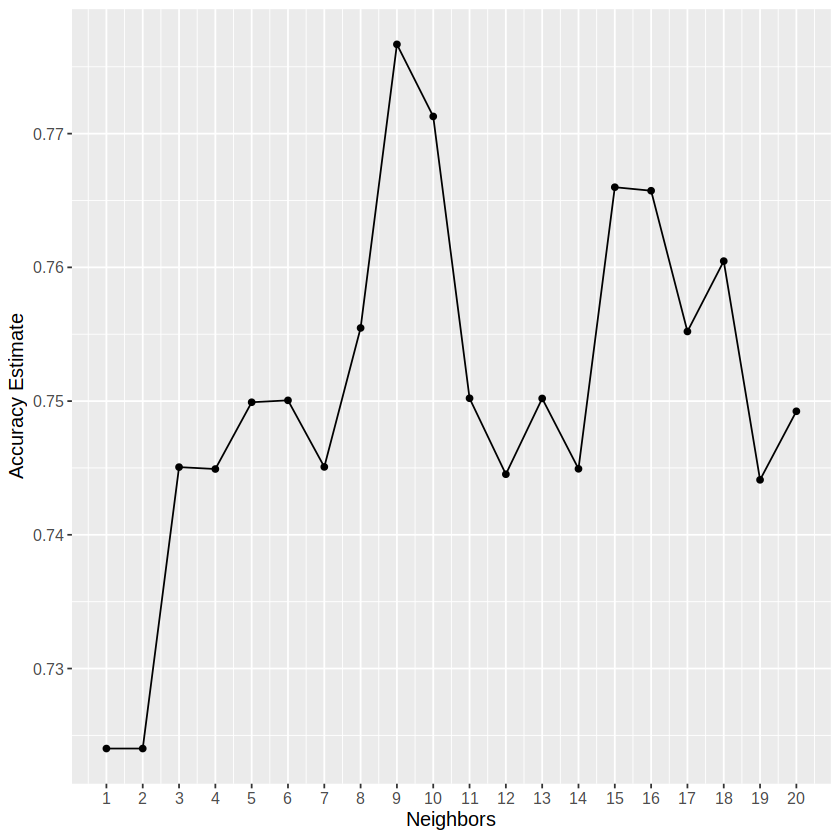

In [10]:
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") + 
    theme(text = element_text(size = 12)) +
    scale_x_continuous(breaks = 1:20)

accuracy_vs_k

In [11]:
k_best <- accuracies |>
    slice_max(order_by = mean, n =1) |>
    select(neighbors) |>
    pull()
k_best

[1] 9

Based on this plot, the best K-value is K = 9.

**Step 4: Create the KNN model using the selected K value**

In [12]:
know_spec_best <- nearest_neighbor(weight_func = "rectangular", neighbors = k_best) |>
  set_engine("kknn") |>
  set_mode("classification")
know_spec_best

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = k_best
  weight_func = rectangular

Computational engine: kknn 


**Step 5: Train the classifier using the training set**

In [13]:
#Create new workflow using the training set
knowledge_best <- workflow() |>
    add_recipe(knowledge_recipe) |>
    add_model(know_spec_best)|>
    fit(knowledge_training)

knowledge_best

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
1 Recipe Step

• step_scale()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(9,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.234375
Best kernel: rectangular
Best k: 9

**Step 5: Predict the labels for the unseen testing set**

In [14]:
#Predicting the testing set
predict_test <- predict(knowledge_best, knowledge_testing) |>
    bind_cols(knowledge_testing)

accuracy_test <- predict_test |> 
    metrics(truth = user_knowledge, estimate = .pred_class)

accuracy_test

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.8181818
kap,multiclass,0.7338710


In [15]:
confusion_matrix <- predict_test |> 
      conf_mat(truth = user_knowledge, estimate = .pred_class)
confusion_matrix

          Truth
Prediction very_low High Low Middle
  very_low        1    0   1      0
  High            0   14   0      2
  Low             3    0  23      4
  Middle          0    2   0     16

#### Model Upsample

**Step 1: Create a balanced dataset by upsampling**

Our first approach to balancing the data is to up-sample. We will accomplish this by creating a recipe with step_upsample applied to the user_knowledge variable and then applying "bake()" to produce a new up-sampled training data set. This new data set will be called knowledge_upsample.

In [16]:
set.seed(100)
knowledge_recipe_up <- recipe(user_knowledge ~ ., data = knowledge_training) |>
    step_upsample(user_knowledge, over_ratio = 1, skip = FALSE)

knowledge_prep_up <- knowledge_recipe_up |> prep() 

knowledge_upsampled <- bake(knowledge_prep_up, knowledge_training)

head(knowledge_upsampled)

study_time_goal,repetition,performance_goal,user_knowledge
<dbl>,<dbl>,<dbl>,<fct>
0.330,0.270,0.10,very_low
0.000,0.000,0.00,very_low
0.250,0.100,0.15,very_low
0.330,0.040,0.10,very_low
0.330,0.040,0.10,very_low
0.251,0.265,0.09,very_low


We then plot the distribution to see if the proportions are all the same for Very Low, Low, Medium, and High.

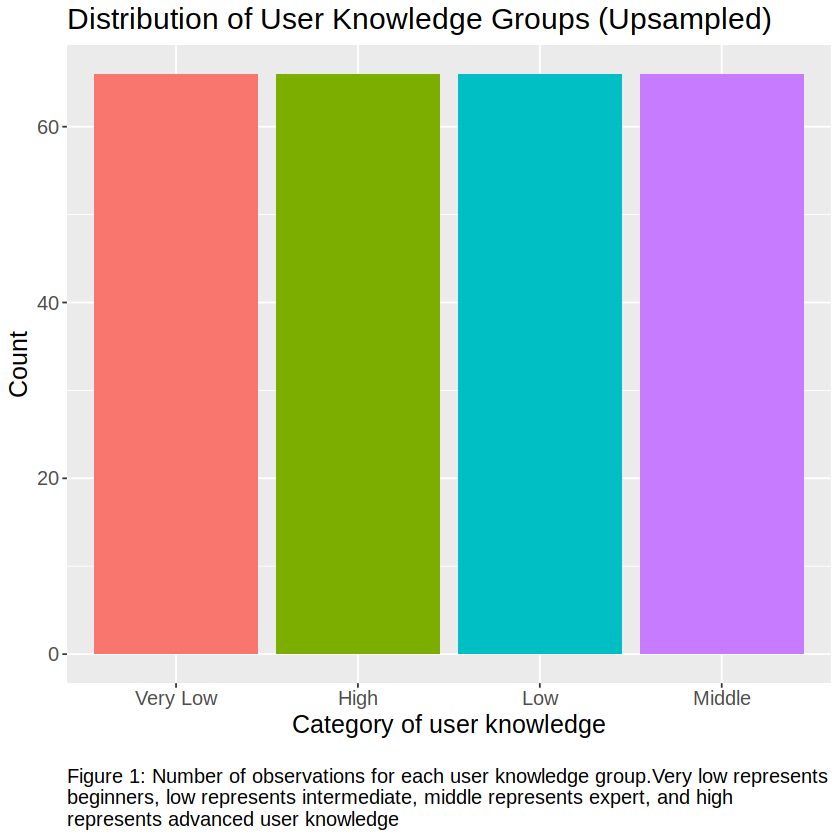

In [17]:
knowledge_training_plot_distribution_up <- knowledge_upsampled |>
    ggplot(aes(x = fct_recode(user_knowledge, "Very Low" = "very_low"), fill = user_knowledge)) + #change the label of very_low to Very Low
    geom_bar() + #use the default stat = "count"
    xlab("Category of user knowledge") +
    ylab("Count")

#make the plot look nicer
knowledge_training_plot_distribution_up <- knowledge_training_plot_distribution_up +
    theme(text = element_text(size = 15), legend.position = "none", #remove the legend
         plot.caption = element_text(hjust = 0)) + #set the text to left align
    ggtitle("Distribution of User Knowledge Groups (Upsampled)") +
    labs(caption = "
Figure 1: Number of observations for each user knowledge group.Very low represents 
beginners, low represents intermediate, middle represents expert, and high 
represents advanced user knowledge") +
    scale_color_brewer(palette = "Set2") #set the color palette
    
knowledge_training_plot_distribution_up

**Step 2: Create a recipe using all predictors and scale the values**

In [18]:
knowledge_recipe_upsampled <- recipe(user_knowledge ~ ., data = knowledge_upsampled) |>
    step_scale(all_predictors())

**Step 2: Tune the model using 5-fold cross-validation**

In [19]:
# create a knn classification model and set the neighbors to tune()
knowledge_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
  set_engine("kknn") |>
  set_mode("classification")

# create a sequence of values from 1 to 20
k_vals <- tibble(neighbors = seq(from = 1, to = 20, by = 1)) 

# split the training data into 5 folds
knowledge_vfold <- vfold_cv(knowledge_upsampled, v = 5, strata = user_knowledge)

# tune the model and collect the accuracy
knowledge_results <- workflow() |>
  add_recipe(knowledge_recipe_upsampled ) |>
  add_model(knowledge_spec) |>
  tune_grid(resamples = knowledge_vfold, grid = k_vals) |>
  collect_metrics() 

# filter the results for accuracies
accuracies_up <- knowledge_results |>
  filter(.metric == "accuracy")

accuracies_up

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.9054945,5,0.02162491,Preprocessor1_Model01
2,accuracy,multiclass,0.9054945,5,0.02162491,Preprocessor1_Model02
3,accuracy,multiclass,0.8140110,5,0.02725048,Preprocessor1_Model03
4,accuracy,multiclass,0.8178571,5,0.02518498,Preprocessor1_Model04
5,accuracy,multiclass,0.7799451,5,0.01953449,Preprocessor1_Model05
6,accuracy,multiclass,0.7722527,5,0.01612710,Preprocessor1_Model06
7,accuracy,multiclass,0.7725275,5,0.01103698,Preprocessor1_Model07
8,accuracy,multiclass,0.7689560,5,0.01360098,Preprocessor1_Model08
9,accuracy,multiclass,0.7464286,5,0.01648123,Preprocessor1_Model09


**Step 3: Choose the appropriate K-value for the training set by plotting accuracy for each selection of K**

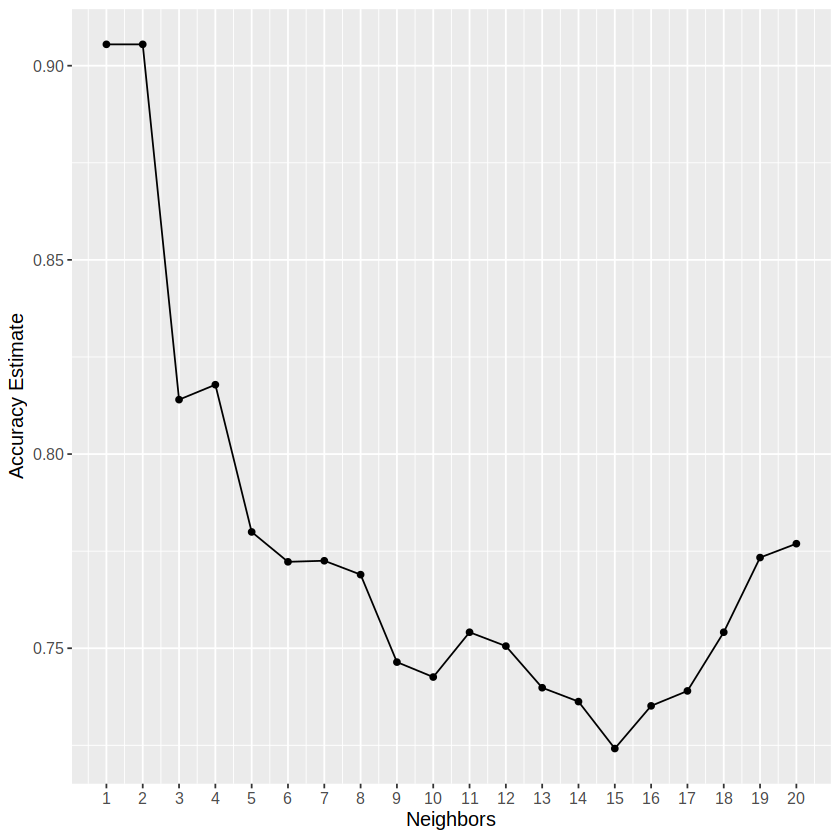

In [20]:
accuracy_vs_k <- ggplot(accuracies_up, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 12)) +
  scale_x_continuous(breaks = 1:20)

accuracy_vs_k

Unfortunately, this plot does not exhibit a clear best K value. At this point, we abandon this model.

#### Model Downsample

**Step 1: Create a balanced dataset by down-sampling**

Our second approach to balancing the data is to down-sample. We will accomplish this by creating a recipe with step_downsample applied to the user_knowledge variable and then applying "bake()" to produce a new down-sampled training data set. This new data set will be called knowledge_downsample.

In [21]:
set.seed(100)
knowledge_recipe_down <- recipe(user_knowledge ~ ., data = knowledge_training) |>
    step_downsample(user_knowledge, over_ratio = 1, skip = FALSE)
knowledge_recipe_down
knowledge_prep_down <- knowledge_recipe_down |> prep() 

knowledge_downsample <- bake(knowledge_prep_down, knowledge_training)

head(knowledge_downsample)

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          3

Operations:

Down-sampling based on user_knowledge, 1

ERROR: [1m[33mError[39m in `step_downsample()`:[22m
[1mCaused by error in `prep()`:[22m
[33m![39m Can't rename variables in this context.


We then plot the distribution to see if the proportions are all the same for Very Low, Low, Medium, and High.

In [ ]:
knowledge_training_plot_distribution_down <- knowledge_downsample |>
    ggplot(aes(x = fct_recode(user_knowledge, "Very Low" = "very_low"), fill = user_knowledge)) + #change the label of very_low to Very Low
    geom_bar() + #use the default stat = "count"
    xlab("Category of user knowledge") +
    ylab("Count")

#make the plot look nicer
knowledge_training_plot_distribution_down <- knowledge_training_plot_distribution_down +
    theme(text = element_text(size = 15), legend.position = "none", #remove the legend
         plot.caption = element_text(hjust = 0)) + #set the text to left align
    ggtitle("Distribution of User Knowledge Groups (Downsampled)") +
    labs(caption = "
Figure 1: Number of observations for each user knowledge group. Very low represents 
beginners, low represents intermediate, middle represents expert, and high 
represents advanced user knowledge") +
    scale_color_brewer(palette = "Set2") #set the color palette
    
knowledge_training_plot_distribution_down

**Step 2: Create a recipe using all predictors and scale the values**

In [ ]:
knowledge_recipe_downsampled <- recipe(user_knowledge ~ ., data = knowledge_downsample) |>
    step_scale(all_predictors())

**Step 2: Tune the model using 5-fold cross-validation**

In [ ]:
# create a knn classification model and set the neighbors to tune()
knowledge_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
  set_engine("kknn") |>
  set_mode("classification")

# create a sequence of values from 1 to 20
k_vals <- tibble(neighbors = seq(from = 1, to = 20, by = 1)) 

# split the training data into 5 folds
knowledge_vfold <- vfold_cv(knowledge_downsample, v = 5, strata = user_knowledge)

# tune the model and collect the accuracy
knowledge_results <- workflow() |>
  add_recipe(knowledge_recipe_downsampled) |>
  add_model(knowledge_spec) |>
  tune_grid(resamples = knowledge_vfold, grid = k_vals) |>
  collect_metrics() 

# filter the results for accuracies
accuracies_down <- knowledge_results |>
  filter(.metric == "accuracy")

accuracies_down

**Step 3: Choose the appropriate K-value for the training set by plotting accuracy for each selection of K**

In [ ]:
accuracy_vs_k <- ggplot(accuracies_down, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 12)) +
  scale_x_continuous(breaks = 1:20)

accuracy_vs_k

In [43]:
k_best <- accuracies_down |>
    slice_max(order_by = mean, n =1) |>
    select(neighbors) |>
    pull()
k_best

[1] 6

In [9]:
# knowledge_recipe <- recipe(user_knowledge ~ ., data = knowledge_training) |>
#     step_upsample(user_knowledge, over_ratio = 1, skip = FALSE)
# knowledge_upsampled_recipe <- knowledge_recipe |> prep() 
# knowledge_upsampled <- bake(knowledge_upsampled_recipe, knowledge_training)
    
# knowledge_recipe_upsampled <- recipe(user_knowledge ~ ., data = knowledge_upsampled) |>
#     step_scale(all_predictors()) |>
#     step_center(all_predictors())
# knowledge_recipe <- recipe(user_knowledge ~ ., data = knowledge_training) |>
#     step_scale(all_predictors()) |>
#     step_center(all_predictors())

**Verify that upsampling resulting in balancing the user_knowledge:**

In [10]:
set.seed(200) #set seed to be reproducible
knowledge_training_plot_distribution <- knowledge_upsampled |>
    ggplot(aes(x = fct_recode(user_knowledge, "Very Low" = "very_low"), fill = user_knowledge)) + #change the label of very_low to Very Low
    geom_bar() + #use the default stat = "count"
    xlab("Category of user knowledge") +
    ylab("Count")

#make the plot look nicer
knowledge_training_plot_distribution <- knowledge_training_plot_distribution +
    theme(text = element_text(size = 15), legend.position = "none", #remove the legend
         plot.caption = element_text(hjust = 0)) + #set the text to left align
    ggtitle("Distribution of User Knowledge Groups") +
    labs(caption = "
Figure 1: Number of observations for each user knowledge group.Very low represents 
beginners, low represents intermediate, middle represents expert, and high 
represents advanced user knowledge") +
    scale_color_brewer(palette = "Set2") #set the color palette
    
#knowledge_training_plot_distribution

**STEP 2: Choose the appropriate K-value for the training set using 5-fold cross-validation and compare accuracy for each selection of K (tune the model)**

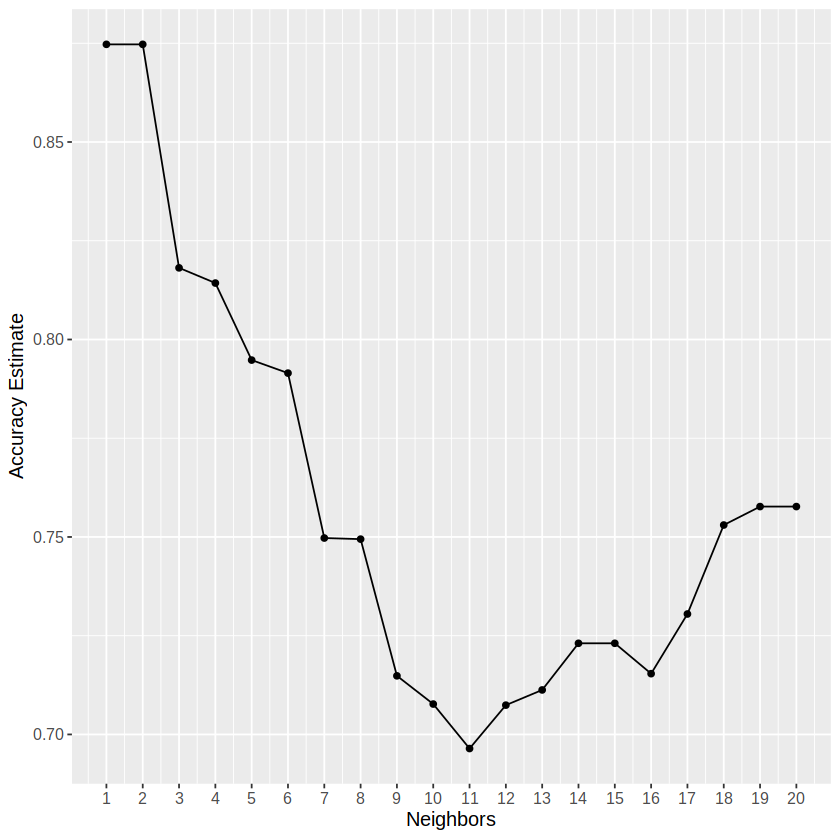

In [11]:
knowledge_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 20, by = 1))

knowledge_vfold <- vfold_cv(knowledge_upsampled, v = 5, strata = user_knowledge)

knowledge_fit <- workflow() |>
  add_recipe(knowledge_recipe_upsampled) |>
  add_model(knowledge_spec) |>
  tune_grid(resamples = knowledge_vfold, grid = k_vals) |>
  collect_metrics() 

accuracies <- knowledge_fit |>
  filter(.metric == "accuracy")

accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 12)) +
  scale_x_continuous(breaks = 1:20)

accuracy_vs_k

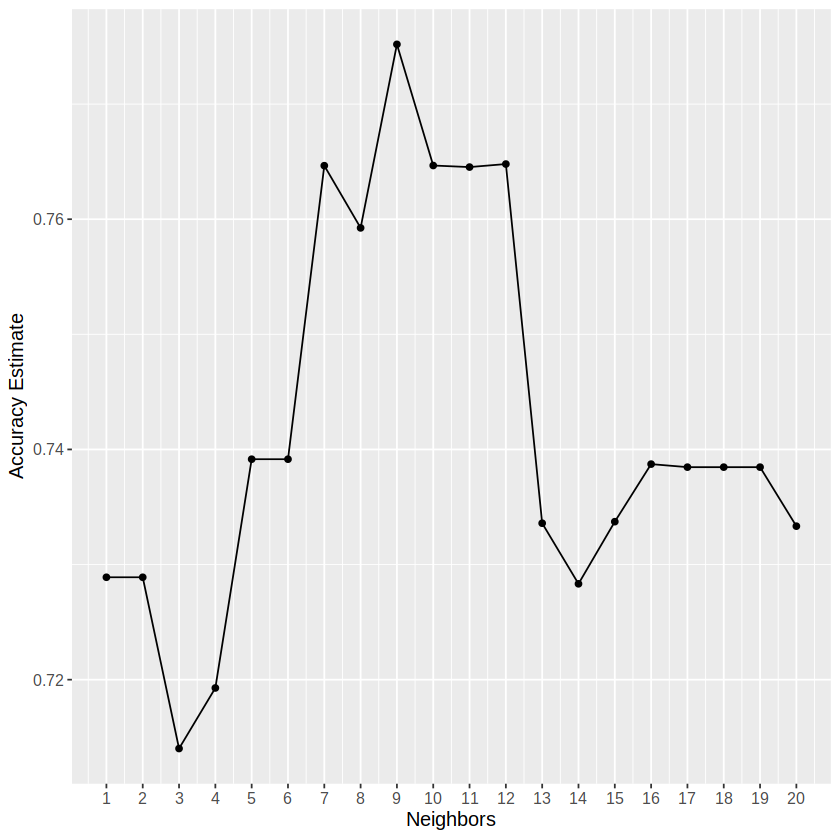

In [12]:
knowledge_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 20, by = 1))

knowledge_vfold <- vfold_cv(knowledge_training, v = 5, strata = user_knowledge)

knowledge_fit <- workflow() |>
  add_recipe(knowledge_recipe) |>
  add_model(knowledge_spec) |>
  tune_grid(resamples = knowledge_vfold, grid = k_vals) |>
  collect_metrics() 

accuracies <- knowledge_fit |>
  filter(.metric == "accuracy")

accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 12)) +
  scale_x_continuous(breaks = 1:20)

accuracy_vs_k

Looking at the graph above, we will chose K = 9 as our K-value.

**STEP 3: Create the KNN model using the selected K value**

In [13]:
know_spec_best <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = 9) |>
  set_engine("kknn") |>
  set_mode("classification")
know_spec_best

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 9
  weight_func = rectangular

Computational engine: kknn 


**STEP 4: Train the classifier using the training set**

In [14]:
#Create new workflow using the training set
knowledge_best <- workflow() |>
  add_recipe(knowledge_recipe) |>
  add_model(know_spec_best)|>
    fit(knowledge_training)

knowledge_best

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(9,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.234375
Best kernel: rectangular
Best k: 9

In [15]:
#Test effectiveness of workflow with training set

predict_train <- predict(knowledge_best , knowledge_training)|>
                        bind_cols(knowledge_training)

head(predict_train)

accuracy_train<-predict_train|>
                        metrics(truth = user_knowledge, estimate = .pred_class)

accuracy_train

.pred_class,study_time_goal,repetition,performance_goal,user_knowledge
<fct>,<dbl>,<dbl>,<dbl>,<fct>
High,0.08,0.080,0.90,High
High,0.18,0.180,0.81,High
High,0.10,0.100,0.90,High
High,0.09,0.300,0.85,High
Middle,0.08,0.325,0.56,High
High,0.20,0.450,0.78,High


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.8229167
kap,multiclass,0.7494242


**STEP 5: Predict the labels for the unseen testing set**

In [16]:
#Predicting the testing set
predict_test <- predict(knowledge_best , knowledge_testing)|>
                        bind_cols(knowledge_testing)

accuracy_test<-predict_test|>
                        metrics(truth = user_knowledge, estimate = .pred_class)

accuracy_test

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.8181818
kap,multiclass,0.7338710


ANALYSIS: Accuracy at 86%, can be considered high.

**STEP 6: Evaluate accuracy and create a confusion matrix to assess precision and recall**

In [17]:
test_mat <- predict_test |> 
      conf_mat(truth = user_knowledge, estimate = .pred_class)
test_mat

          Truth
Prediction very_low High Low Middle
  very_low        1    0   1      0
  High            0   14   0      2
  Low             3    0  23      4
  Middle          0    2   0     16

**STEP 7: Analyze performance using precision, recall, and accuracy**